# Minería de Datos (Master en Data Science, UIMP-UC)

## Práctica k-NN

## Máster Data Science (Diciembre 2019)
### M.N Legasa (legasam@unican.es),  Santander Meteorology Group.

Como se explicó en la sesión de teoría, la técnica k-NN puede utilizarse tanto para **clasificación** como para **regresión**. En esta práctica vamos a trabajar con el dataset *MNIST* para clasificación de dígitos en imágenes y con datos meteorológicos para predecir la lluvia diaria en Lisboa. Utilizaremos los paquetes y funciones vistos ya en clase.

### Aplicación de la técnica k-NN para clasificación
Para este ejemplo utilizaremos el dataset *MNIST*. Como ya habéis visto, se trata de reconocer dígitos (0, 1, ..., 9) en una colección de imágenes. En primer lugar cargamos el dataset (sólo la parte de train) con la función *read.csv*. El fichero *.csv* se puede descargar de https://github.com/SantanderMetGroup/Master-Data-Science/tree/master/Data_mining/datasets.

In [1]:
data = read.csv("MNIST_train.csv")

Recordemos que en la primera variable está la variable objetivo (el dígito) y el resto son los píxeles de la imagen. Efectivamente, podemos ver los dígitos si reorganizamos los píxeles:

[1] 0

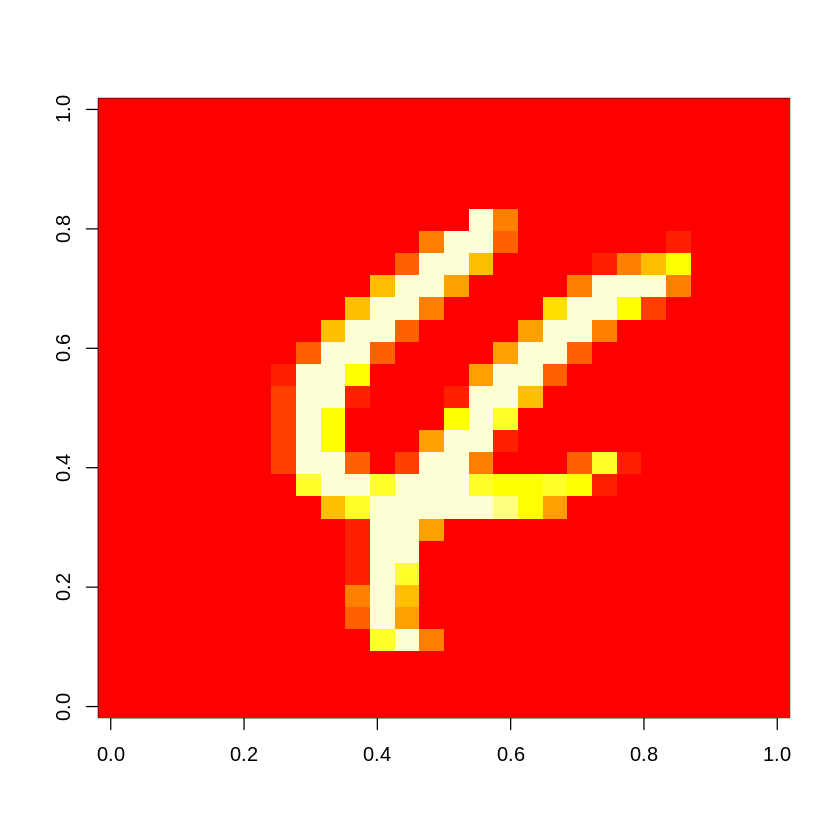

In [2]:
image( t(apply(matrix(as.numeric(data[900,-1]), nrow = 28, ncol = 28, byrow = TRUE ),  2, rev)) )
data[6,1]

Lo primero es convertir nuestra variable objetivo a factor. Además, puesto que el dataset es muy grande (42000 muestras), trabajaremos sólo con las 2000 primeras instancias. De entre éstas, nuestro dataset de train estará formado por las 1000 primeras, y el de test por las 1000 segundas.

In [3]:
# converting target variable to factor
data[,1] = as.factor(data[,1])

## train/test partition
indtrain = 1:1000
indtest = 1001:2000
data.train = data[indtrain,] 
data.test = data[indtest,]

El primer ejercicio será utilizar la función `knn` (paquete `class`) para clasificar los dígitos de test, 

**Ejercicio 1)** Considerando para ello los 10 vecinos más cercanos en el train, calcula el porcentaje de aciertos (total) sobre el test.

In [4]:
library(class)
?knn

# Continuar ejercicio...
pred = knn(train = data.train[ , -1], test = data.test[, -1], 
           cl = data.train$label,
           k = 10)
sum(pred == data.test$label) / length(pred)

[1] 0.848

Hemos visto que el error total de clasificación de nuestro método k-NN (con k=10) está en torno al 15%. Vamos a generar ahora un barplot con la tasa de aciertos para cada dígito (0, 1, ..., 9) que nos permita hacer un ranking con los mejor y peor clasificados.  
**Ejercicio 2)** Crea un barplot que muestre el porcentaje de aciertos por dígito.

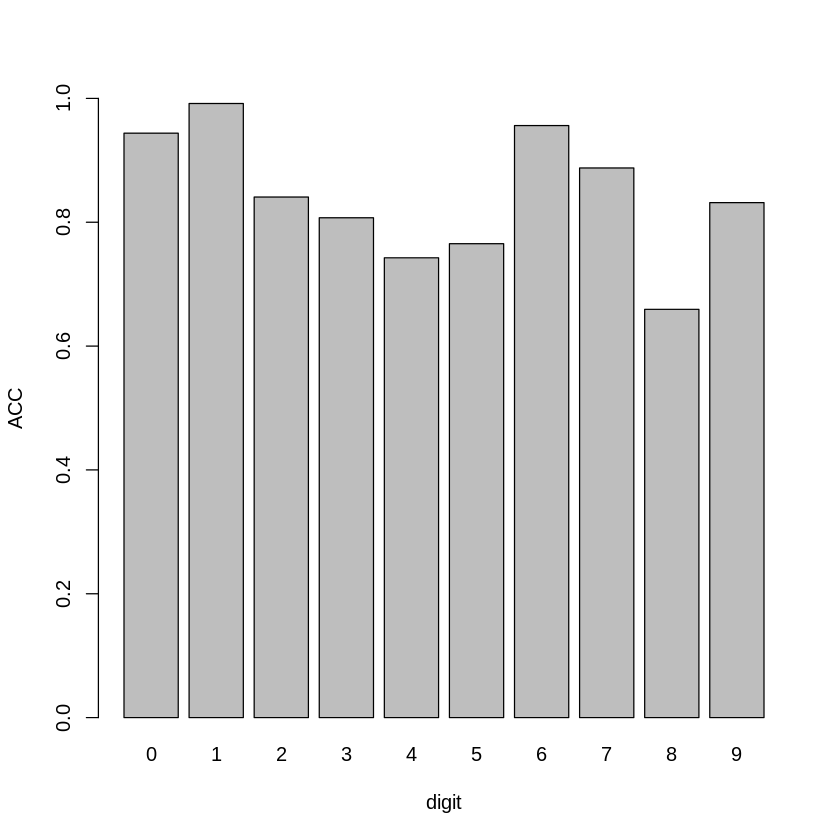

In [5]:
barplot( sapply(levels(data.train$label), function(digit) mean(pred[which(data.test$label == digit)] == digit),
                USE.NAMES = T) ,
             ylim = c(0, 1), xlab = "digit", ylab = "ACC")

Hasta ahora hemos validado predicciones determinisitas (binarias) para cada categoría (es decir, cada dígito). Hemos visto en la teoría que la técnica k-NN busca los vecinos más cercanos y da como clase ganadora la que aparezca más veces entre los mismos. Sin embargo, en lugar de predicciones deterministas, podríamos dar también predicciones probabilísticas (hay un 15% de probabilidades de que la clase ganadora sea un 0, un 5% de que sea un 1, un 32% de que sea un 7, etc.). 

A continuación, vamos a programar la técnica k-NN (con k=10) manualmente, de forma que, para cada instancia del test, daremos como predicción la probabilidad de encontrar cada una de las 10 clases (0, 1, ..., 9). Para ello...

**Ejercicio 3.1)** Lo primero que necesitamos es calcular las distancias. Así que, en primer lugar, tenemos que construir una matriz de datos cuyas *filas* sean la distancia (euclídea) de cada elemento de `data.test` con todos los elementos de `data.train`. La función `dist()` permite calcular la distancia euclídea entre cada fila de dicha matriz y todas las demás. Nota: Convierte el objeto que devuelve `dist()` a matriz para poder trabajar con él (`as.matrix()`).

In [6]:
dist.matrix <- dist(rbind(data.train[ ,-1], data.test[ ,-1]), method = "euclidean")
dist.matrix <- as.matrix(dist.matrix)
dist.matrix <- dist.matrix[(nrow(data.train)+1):nrow(dist.matrix), 1:nrow(data.train)]

Una vez conocemos estas distancias, tendremos que ver, para cada elemento del test, cuáles son los 10 vecinos más próximos en el train. A partir de estos 10 vecinos, podemos calcular la probabilidad de cada clase (0, 1, ..., 9). 


**Ejercicio 3.2)** Para cada elemento de `data.test`, obtén los 10 vecinos más cercanos. La función `sort()` puede ser de ayuda, es posible que tengas que usarla con el argumento `index.return = TRUE`, verifica en la ayuda de la función cómo funciona.

In [7]:
k <- 10
knn_ <- matrix(NA, nrow = nrow(dist.matrix), ncol = k)
# Continuar aquí...

for (i in 1:nrow(dist.matrix)){
    knn_[i,] <- as.numeric(as.character(data.train[sort(dist.matrix[i, ], index.return = T)$ix[1:k], "label"]))
}
knn_[201,]

[1] 6 6 0 6 0 0 6 0 6 6

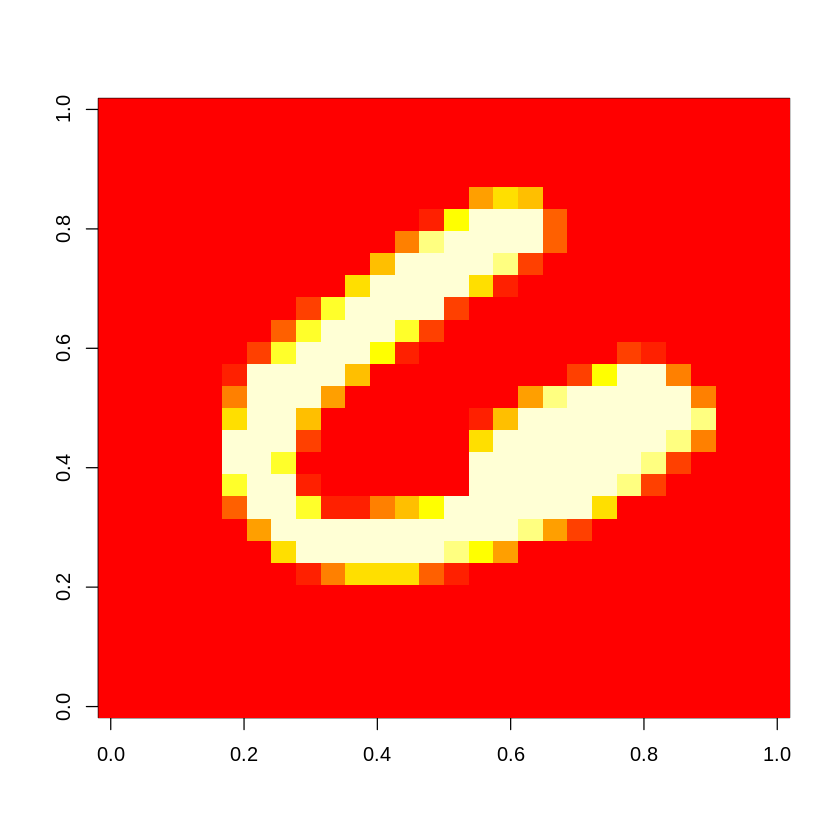

In [8]:
image( t(apply(matrix(as.numeric(data.test[201,-1]), nrow = 28, ncol = 28, byrow = TRUE ),  2, rev)) )

**Ejercicio 3.3)** A partir de los vecinos más cercanos, calcula la probabilidad de obtener cada dígito. Llama al objeto resultado `knn.prob`.

In [9]:
k <- 10
knn.prob <- matrix(NA, nrow = nrow(dist.matrix), ncol = k)
for (i in 1:nrow(dist.matrix)){
    knn.prob[i,] <- as.numeric(as.character(data.train[sort(dist.matrix[i, ], index.return = T)$ix[1:k], "label"]))
    knn.prob[i,] <- sapply(0:9, function(digit) mean(digit == knn.prob[i, ]))
}
colnames(knn.prob) <- 0:9                    

In [10]:
knn.prob[201, ]

0   1   2   3   4   5   6   7   8   9 
0.4 0.0 0.0 0.0 0.0 0.0 0.6 0.0 0.0 0.0

Una forma de validar predicciones más informativa que la de simplemente utilizar el ratio de predicciones correctas es mediante las curvas ROC. 

Para construir la curva ROC para una cierta clase (dígito) necesitaremos observaciones binarias (clase sí/clase no) y predicciones probabilísticas. A modo de ejemplo, dibujamos la curva ROC correspondiente al dígito 7. También calculamos el área encerrada bajo dicha curva (llamada normalmente *AUC*).  
**Nota:** Utiliza las funciones *roc* y *auc* del paquete *AUC*.

In [11]:
library(verification)

Loading required package: fields
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.4-0 (2019-11-01) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 
Loading required package: boot
Loading required package: CircStats
Loading required package: MASS
Loading required package: dtw
Loading required package: proxy

Attaching package: ‘proxy’

The following object is masked from ‘package:spam’:

    as.matrix

The following objects are masked from ‘package:stats’:

    as.dist, dist

The following object is masked from ‘p

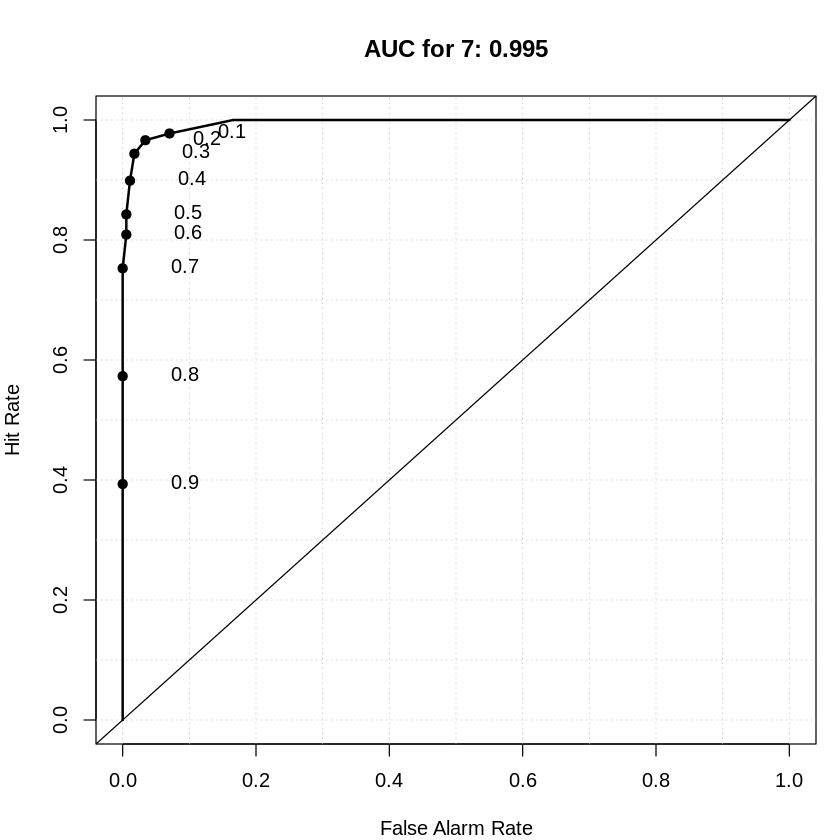

In [12]:
digit <- 7
auc = roc.area(data.test$label == digit, knn.prob[, digit + 1])$A
roc.plot(data.test$label == digit, knn.prob[, digit + 1], 
         main = paste0("AUC for " , digit , ": ", round(auc, 3)))

En general el 1 se clasifica muy bien, incluso independientemente de dónde fijemos el umbral. Esto significa que cuando el modelo detecta un 1, lo suele hacer con bastante precisión. 

**Ejercicio 4** Verifícalo. Verifica también qué ocurre con el número 8 construyendo la curva ROC y comenta los resultados. ¿Es el AUC bueno?

In [13]:
# Se trata de verificar, basta visualmente, nuestra precicción.
knn.prob[which(data.test[, 1] == 1),2]

[1] 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 [19] 0.9 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 [37] 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.9 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 [55] 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 [73] 1.0 1.0 0.3 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.8
 [91] 1.0 0.8 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
[109] 1.0 1.0 1.0 1.0 1.0 0.9 1.0 1.0 1.0 0.6 1.0 1.0 1.0

Claramente en general hay consenso absoluto con el 1, no tanto con el 8:

In [14]:
knn.prob[which(data.test[, 1] == 8),9]

[1] 0.7 0.3 0.3 0.9 0.5 0.9 0.7 0.2 0.6 0.7 1.0 0.3 0.9 0.7 0.4 0.8 0.4 0.1 0.7
[20] 1.0 0.5 0.0 0.9 0.0 0.1 0.4 0.8 0.5 0.8 0.9 1.0 1.0 0.2 0.7 0.6 0.0 1.0 0.9
[39] 0.8 0.3 0.2 0.8 0.4 0.9 0.8 0.0 0.5 1.0 1.0 0.7 1.0 0.3 0.7 0.7 1.0 0.7 0.7
[58] 0.8 0.0 1.0 0.8 0.4 0.5 0.4 0.9 0.3 1.0 0.9 0.1 0.7 0.2 0.3 0.6 0.5 0.2 0.0
[77] 0.8 0.9 0.1 0.3 0.8 0.6 0.8 1.0 1.0 0.3 0.2 0.6 0.7 0.1 0.4

In [15]:
for (umbral in seq(0,1, by = 0.01)){
print(c(TPR = mean(knn.prob[which(data.test[, 1] == 8), 9] >= umbral ),
       FPR = mean(knn.prob[which(data.test[, 1] != 8), 9] >= umbral )))
}

TPR FPR 
  1   1 
      TPR       FPR 
0.9340659 0.1045105 
      TPR       FPR 
0.9340659 0.1045105 
      TPR       FPR 
0.9340659 0.1045105 
      TPR       FPR 
0.9340659 0.1045105 
      TPR       FPR 
0.9340659 0.1045105 
      TPR       FPR 
0.9340659 0.1045105 
      TPR       FPR 
0.9340659 0.1045105 
      TPR       FPR 
0.9340659 0.1045105 
      TPR       FPR 
0.9340659 0.1045105 
      TPR       FPR 
0.9340659 0.1045105 
       TPR        FPR 
0.87912088 0.03520352 
       TPR        FPR 
0.87912088 0.03520352 
       TPR        FPR 
0.87912088 0.03520352 
       TPR        FPR 
0.87912088 0.03520352 
       TPR        FPR 
0.87912088 0.03520352 
       TPR        FPR 
0.87912088 0.03520352 
       TPR        FPR 
0.87912088 0.03520352 
       TPR        FPR 
0.87912088 0.03520352 
       TPR        FPR 
0.87912088 0.03520352 
       TPR        FPR 
0.87912088 0.03520352 
       TPR        FPR 
0.81318681 0.01760176 
       TPR        FPR 
0.81318681 0.01760176 
       TPR

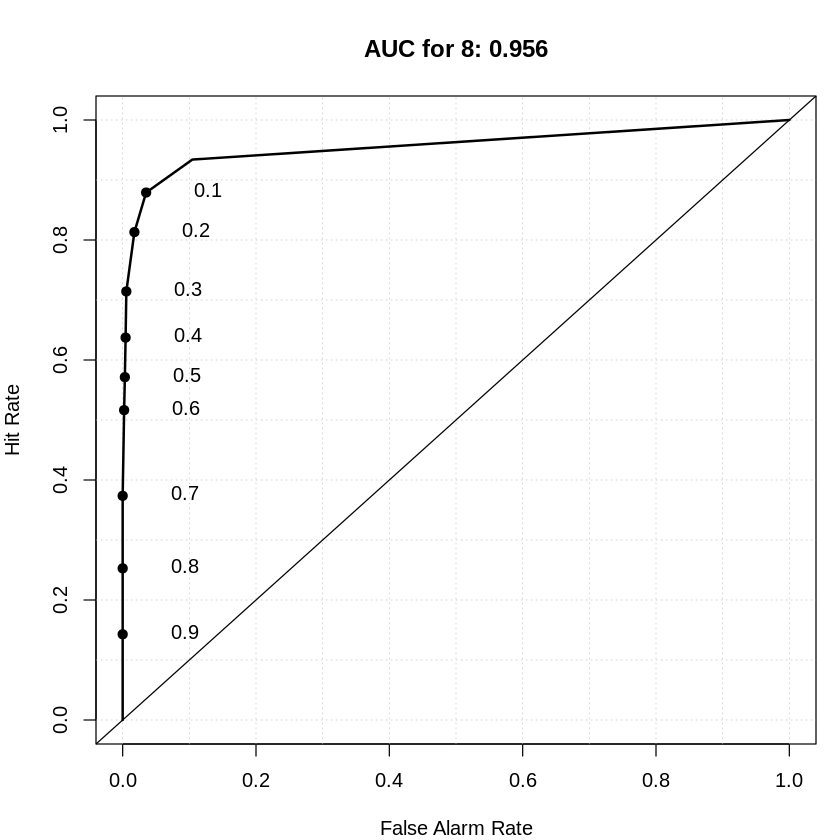

In [16]:
digit <- 8
auc = roc.area(data.test$label == digit, knn.prob[, digit + 1])$A
roc.plot(data.test$label == digit, knn.prob[, digit + 1], 
         main = paste0("AUC for " , digit , ": ", round(auc, 3)))

Por último, nos planteamos la pregunta *¿Cuántos vecinos deberíamos coger?* Recordemos que cuanto más bajo el número de vecinos mayor probabilidad de sobreajuste, pero si éste es muy alto el modelo va a tender a perder capacidad predictiva.

**Ejercicio 5** Compruébalo. 

In [17]:
ks <- c(1,2, 3,4, 5, 10, 15, 20, 50, 100)
accuracy.knn <- rep(NA, length(ks))
names(accuracy.knn) <- ks
# continuar aquí
for (k in ks){   
    obs <- data.test[ , 1]
    pred <- knn(train = data.train[, -1], test = data.test[, -1],
                cl = data.train[, "label"], k = k)
    accuracy.knn[as.character(k)] <- sum(diag(table(obs, pred)))/sum(table(obs, pred))            
}
accuracy.knn

1     2     3     4     5    10    15    20    50   100 
0.874 0.860 0.874 0.865 0.873 0.852 0.843 0.820 0.739 0.686

El modelo con mayor accuracy es el de 3 vecinos cercnos, aunque no parece haber mucho sobreajuste con menos vecinos. A partir de ahí, el modelo empieza a perder capacidad de predicción y pierde accuracy.

### Aplicación de la técnica k-NN para regresión 
Como ya se explicó en la sesión de teoría, en el *downscaling* estadístico se trata de predecir variables meteorológicas de escala local (por ejemplo la precipitación y/o temperatura observada en un punto determinado) a partir de variables de larga escala dadas por un modelo númerico cuya resolución espacial es mucho menor (por ejemplo la presión, los vientos, la humedad específica...).

En este ejemplo utilizaremos la técnica k-NN para intentar predecir la lluvia diaria observada en Lisboa (predictando) a partir de un conjunto de predictores (variables de larga escala). 

En primer lugar cargamos el dataset `df`, directamente guardado en el archivo *df.rda*, `un dataset` con 2000 filas y 321 columnas (compruébalo). La primera columna será nuestra variable obejtivo (precipitación en Lisboa), y las 320 restantes nuestros predictores (variables atmosféricas de larga escala). La variable objetivo tiene de nombre `precip`.

In [18]:
load("df.rda")
head(df)

precip,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10.9,57042.96,56534.84,55884.40,55175.59,54458.21,56980.27,56460.59,55800.02,55051.15,⋯,101985.9,101627.3,101357.2,101110.7,101291.0,101814.9,101479.4,101164.5,100970.7,100905.3
0.6,56963.20,56493.45,55930.82,55340.20,54768.63,56856.57,56361.95,55776.76,55164.26,⋯,102048.1,102069.7,102204.5,102480.3,102858.8,101973.3,102033.3,102165.5,102323.9,102534.2
13.0,56522.59,55971.40,55304.34,54498.03,53725.15,56514.84,55977.71,55327.28,54569.78,⋯,102399.1,102448.4,102438.3,102434.3,102339.8,102669.7,102565.5,102530.3,102453.6,102487.1
0.0,54627.98,53979.80,53494.05,53072.98,52616.36,54776.17,54089.05,53516.98,53012.86,⋯,100970.0,100672.8,100360.7,100133.7,100028.4,101126.2,100700.0,100381.3,100118.3,100319.8
0.0,53584.38,53391.01,53310.38,53292.82,53340.13,53781.70,53498.13,53306.82,53213.26,⋯,100652.7,100663.5,100747.7,100934.0,101015.8,100801.6,100685.3,100777.5,100909.4,101164.7
1.2,54221.86,54220.24,54328.55,54772.49,55251.11,54391.11,54345.93,54284.05,54525.99,⋯,101358.6,101511.5,101798.9,102142.2,102368.5,101438.7,101440.9,101685.3,102030.7,102311.9


Ya que las vamos a necesitar posteriormente, crearemos una nueva variable *y* (vector predictando con la precipitación en Lisboa) y otra *x* (matriz con los predictores de larga escala).

In [19]:
y = df[, 1]
x = df[, -1]

Para visualizar los datos, dibujamos la serie diaria de precipitación observada:

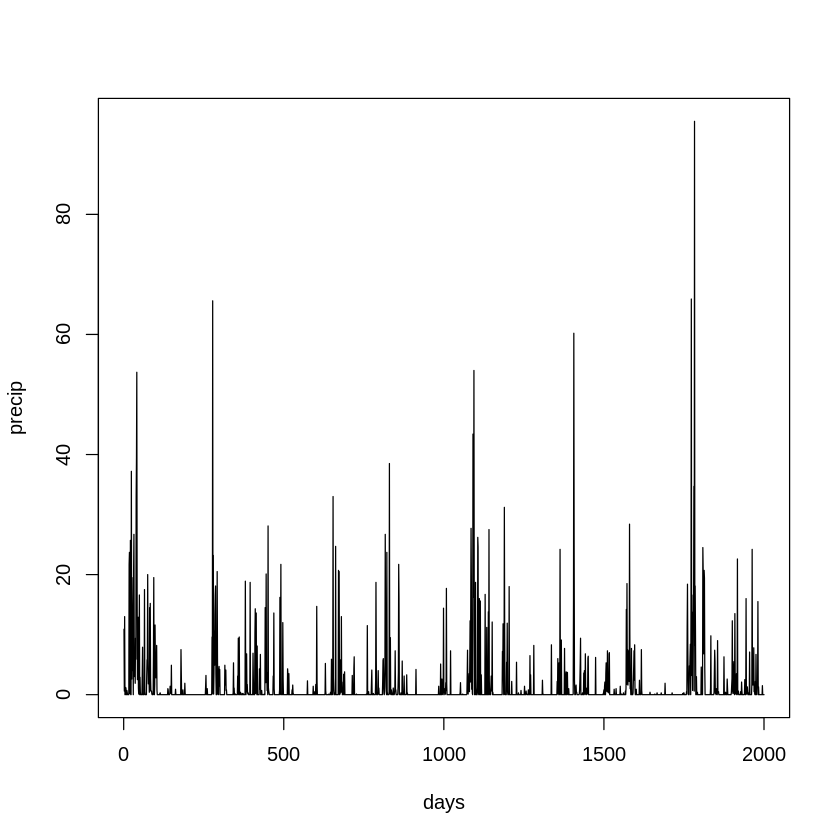

In [20]:
# data visualization
plot(y, xlab = "days", ylab = "precip", type = "l")

Nuestro siguiente paso será dividir el dataset total en dos subconjuntos independientes de train y test (75% y 25%, respectivamente). Crea las variables *df.train*, *df.test*, *x.train*, *y.train*, *x.test*, *y.test*.

In [21]:
## train/test partition
n = nrow(df)
indtrain = sample(1:n, round(0.75*n))
indtest = setdiff(1:n, indtrain)

# 75% train
df.train = df[indtrain, ]
x.train = x[indtrain, ]
y.train = y[indtrain]

# 25% test
df.test = df[indtest, ]
x.test = x[indtest, ]
y.test = y[indtest]

Lo primero es buscar el *k* óptimo para nuestro método k-NN. Antes, echa un vistazo a los predictores (mira, por ejemplo, los predictores 1 y 214). 

**Ejercicio 6)** ¿Intuyes algún problema?

El problema es que los predictores tienen escalas muy distintas (observa la media y la varianza), por tanto el de mayores escalas dominará sobre el de pequeñas. La solución es centrarlos y escalarlos (Restar la media y dividir por la desviación típica). De esta forma ambos predictores tendrán la misma media y desviación típica.

In [22]:
colMeans(x.test[,c(1,214)])
apply(x.test[,c(1,214)], MARGIN = 2, sd) # Standard Deviation para ambos predictores.

X1         X214 
5.642195e+04 5.063122e-03

X1         X214 
1093.6448299    0.0019836

**Ejercicio 7)** Para ello emplearemos `caret`. Considera una cross-validación hold-out sobre el dataset `df.train` y barre todos los `k` del vector `ks <- c(1, 3, 5, 10, 15, 20, 50, 100)`.  Observa cómo varía la métrica con `k`. ¿Cuál es el k óptimo?

Nota: Recuerda las funciones de `caret` `trainControl(method = cv, number = 2)` y `train()`. El `method` para k-NN es "knn". Puede hacerse  manualmente pero, en `caret`, el argumento `preProcess = c("center", "scale")` centra y escala los datos.

In [23]:
library(caret)

Loading required package: lattice

Attaching package: ‘lattice’

The following object is masked from ‘package:boot’:

    melanoma

Loading required package: ggplot2


,k
,<dbl>
6,20


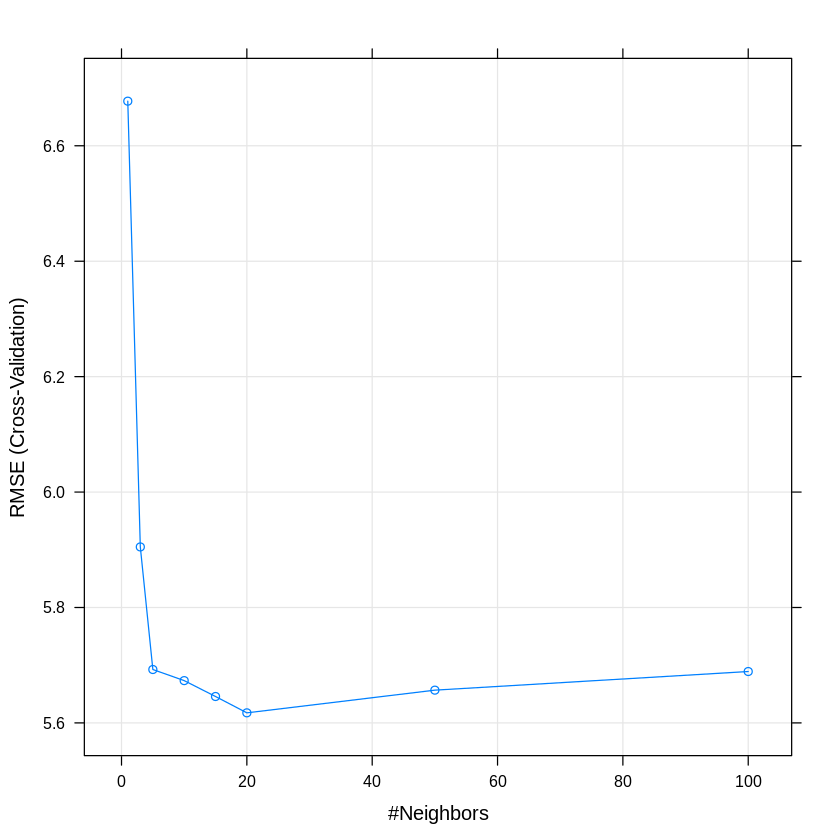

In [24]:
trctrl = trainControl(method = "cv", number = 2)
tuneGrid_ <- expand.grid(k = c(1, 3, 5, 10, 15, 20, 50, 100))
# Continuar aquí...

knn.fit = train(precip ~ .,
                df.train,
                method = "knn",
                trControl = trctrl,
                preProcess = c("center", "scale"),
                tuneGrid = tuneGrid_)

plot(knn.fit)
knn.fit$bestTune

Hemos visto que el RMSE disminuye con *k*. Pero para determinar cuán buena/mala es nuestra predicción no deberíamos fijarnos en una única medida, si no que debemos tener en cuenta un abanico más amplio de métricas que nos permitan caracterizar otros aspectos de la predicción que puedan ser de interés. Por ejemplo, el error cuadrático medio puede ser muy bajo y aún así el modelo no estar acertando con los días de lluvia/no lluvia.

En este caso podemos considerar, además del RMSE, las siguientes métricas de validación:  
* Tasa de aciertos (o *accuracy*): permite evaluar el evento binario *lluvia/no lluvia*. Se suele tomar la cantidad $\geq 0.1$ mm como umbral para definir un día como *húmedo*.
* Correlación de Spearman: permite evaluar cuán bien la serie temporal predicha (completa; es decir, lluvia y no lluvia) sigue la observación. Su sintáxis en *R* sería cor(obs, pred, method = “spearman”).
* *Ratio* de varianzas: permite evaluar hasta qué punto la variabilidad total de nuestra predicción (serie completa) se asemeja a la observada. Se calcula como var(pred) / var(obs).
Utiliza la configuración óptima que hemos obtenido con *caret* para predecir la lluvia en el test, y valida los resultados en función de estas 4 métricas.  


**Ejercicio 8)** Construye una función que, dada la predicción y las observaciones, calcule estas 4 medidas. Aplícala a los resultados predichos para `df.test` (función `predict()`).

In [25]:
error.measures <- function(obs, pred){
    if (length(obs) != length(pred)) stop("Length mismatch")
    else{
        # rmse
        rmse <-  sqrt(mean((obs - pred)^2))
    
        # Spearman correlation
        spearman <- cor(obs, pred, method = "spearman")
        
        # ratio of variances
        variance.ratio <- var(pred) / var(obs)
        
        ## accuracy binary 
        obs[obs < 0.1] <- 0
        obs[obs >= 0.1] <- 1
        pred[pred < 0.1] <- 0
        pred[pred >= 0.1] <- 1
        
        accuracy <- sum(diag(table(obs, pred)))/length(obs)
        
        return(cbind(rmse, spearman, accuracy, variance.ratio))
    }
}

In [26]:
pred = predict(object = knn.fit, newdata =  df.test[, -1])
error.measures(df.test$precip, pred)

rmse,spearman,accuracy,variance.ratio
4.250824,0.5993326,0.616,0.1776076


**Ejercicio 9)** Con Caret, prueba los parámetros `ks = c(1, 3, 5, 10, 15, 20, 50, 100)` para ver qué modelo es mejor, teniendo en cuenta esta vez todas las medidas. Esta vez entrena con todo `df.train` y obtén las predicciones para `df.test`.

`trControl = trainControl(method="none")` permite directamente crear el modelo predictivo sin hacer cross-validación.

**¿Qué conclusiones obtienes? ¿Cuál sería para tí un *k* óptimo?**

In [27]:
ks = c(1, 3, 5, 10, 15, 20, 50, 100)
# Continuar aquí...
obs <- df.test$precip

error.measures.k <- matrix(NA, nrow = length(ks), ncol = 4)
rownames(error.measures.k) <- ks
colnames(error.measures.k) <- c("rmse", "spearman", "accuracy", "variance.ratio")

for (k in ks){
    model <-
    train(precip ~ ., data = df.train,
                 method = "knn",
                 tuneGrid = expand.grid(k = k),
                 preProcess = c("center", "scale"),
                 trControl = trainControl(method = "none"))
    pred <- predict(model, newdata = df.test)
    error.measures.k[as.character(k), ] <- error.measures(obs, pred)
}
error.measures.k

,rmse,spearman,accuracy,variance.ratio
1,5.433540,0.4709571,0.776,0.7840018
3,4.527493,0.5712970,0.776,0.3137900
5,4.333427,0.5741079,0.748,0.2785210
10,4.186834,0.6003504,0.686,0.2213339
15,4.239714,0.5990304,0.636,0.1837351
20,4.250824,0.5993326,0.616,0.1776076
50,4.352751,0.5761804,0.520,0.1396528
100,4.395197,0.5714231,0.470,0.1092926
